## SCORE Prediction
 * To predict the score of student based on study hours

In [7]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# import data
data=pd.read_csv('student_scores - student_scores.csv')

In [9]:
# a look at the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
# check for null values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
# description of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


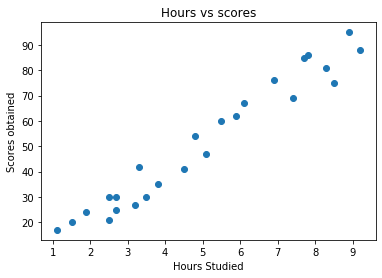

In [12]:
# plotting graph to get better insight of data
fig,ax=plt.subplots()
plt.title('Hours vs scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores obtained')
ax.scatter(data['Hours'],data['Scores'])

### The above graph indicates that as hours studied increases the scores obtained also increases i.e there is a positive linear relation.

In [16]:
X=data.drop("Scores",axis=1)
y=data['Scores']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [18]:
# import Linear_regression model
from sklearn.linear_model import LinearRegression

# create object of LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

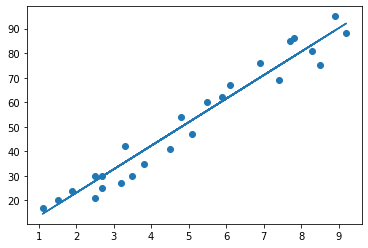

In [19]:
# plotting line of regression
line=reg.coef_*X+reg.intercept_

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [20]:
reg.score(X_train,y_train)

0.9516536821574559

In [21]:
# Make predictions
y_pred=reg.predict(X_test)

In [22]:
y_pred

array([62.40921319, 14.53174465, 37.51292955, 40.38557766, 27.93743584])

In [23]:
# comparing 
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [24]:
df

,Actual,Predicted
18,67,62.409213
14,17,14.531745
4,30,37.512930
22,35,40.385578
0,21,27.937436


In [37]:
# testing with own data point
hour=[9.25]
hours=pd.DataFrame(hour)
own=reg.predict(hours)
for hour in hours:
    print(f"Hours: {hour}")
print(f"Predicted score: {own[0]}")

Hours: 0
Predicted score: 92.57201837282055


In [38]:
# evaluating the model
from sklearn import metrics 
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 5.378997042008351
